DOMAIN: Automobile

CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.
The vehicle may be viewed from one of many different angles.'

PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the
model using just the raw data.

In [1]:
#import libraries that will be used for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load tha data set and take the fist glance at the data
cars = pd.read_csv('Part3 - vehicle.csv')
cars.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
#CHeck the shape of the data
cars.shape
# we have 846 obsrvations with 19 differnet features of cars/van/bus

(846, 19)

In [4]:
cars.info()
#We can see that there are may feature with null values however all the columns are numeic except for target columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [5]:
cars.isnull().sum()
# we can see below are the features with missing values

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
#Bfore fixing the null values lets check 5 point summary of te data
cars.describe().T
#we can observe that mean value of almost all the features is near aound at 50% of the data
# so we can say that data is good and we can use Mean value of each feature to be rplaces with null values
# Also, sicne we have all the columns, we dont have any '?' values in the dataset 

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [7]:
#Lets fix the null values first before proceeding further
#Replace blank valus with Nan values
cars = cars.replace('', np.nan)

#Replace the Null value with the mean value of each column
for i in cars.columns[:17]:
    mean = cars[i].mean()
    cars[i] = cars[i].fillna(mean)

In [8]:
#Lets confirm if we have any null values in the data anymore
cars.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
#Lets check the class wise distribution of the data
cars['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

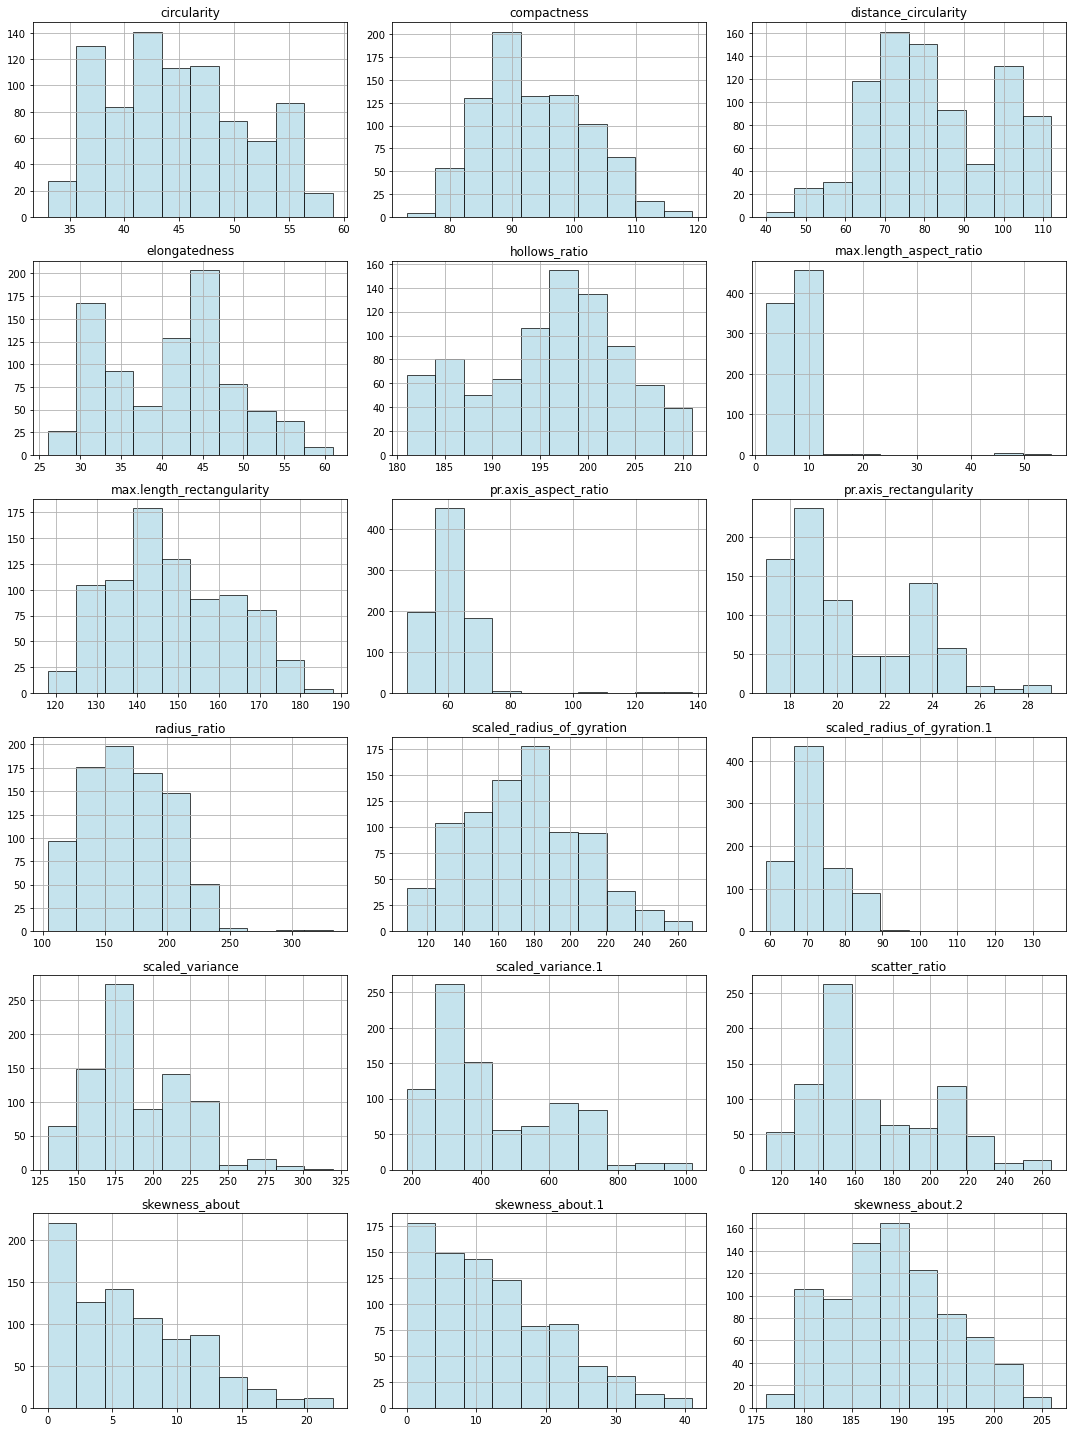

In [10]:
#Lets check the distribution of each feature
cars.hist(color='lightblue', edgecolor = 'black', alpha = 0.7, figsize = (15,20), layout=(6,3))
plt.tight_layout()
plt.show()
#we can see that distribution is quite normal for all columns except for Max.length_aspect_ratio, pr.axis_aspect_ratio,
#scaled_radious_of_gyrathon, pr.axis_rectangularity, skewness_about, skewness_about.1

In [11]:
# For Skewness, closer the value to 0, perfectly the distribution follows normal distribution
#negative skew: The left tail is longer; the mass of the distribution is concentrated on the right of the figure.
#positive skew: The right tail is longer; the mass of the distribution is concentrated on the left of the figure. 
cars.skew()

#From below we can clearly see that pr.axis_aspect_ratio,max.length_aspect_ratio and scaled_radius_of_gyration.1    
#are highly skewed data and distribution for other features is quite acceptale

compactness                    0.381271
circularity                    0.262584
distance_circularity           0.106837
radius_ratio                   0.396381
pr.axis_aspect_ratio           3.834882
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607629
elongatedness                  0.047875
pr.axis_rectangularity         0.772254
max.length_rectangularity      0.256359
scaled_variance                0.652753
scaled_variance.1              0.843027
scaled_radius_of_gyration      0.279647
scaled_radius_of_gyration.1    2.088422
skewness_about                 0.779277
skewness_about.1               0.688423
skewness_about.2               0.249468
hollows_ratio                 -0.226341
dtype: float64

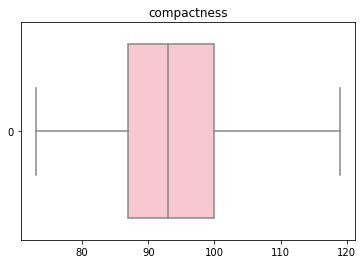

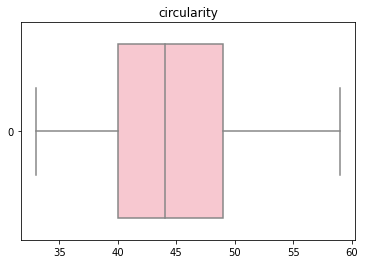

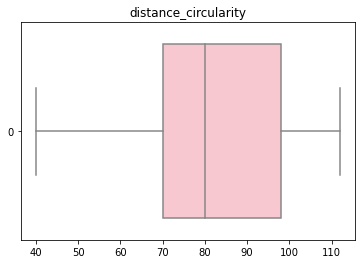

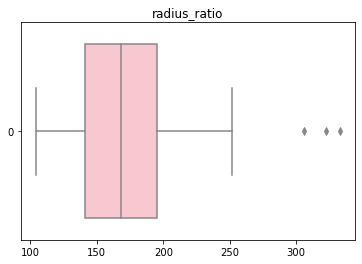

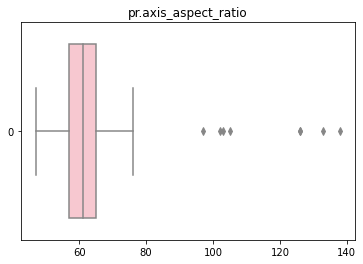

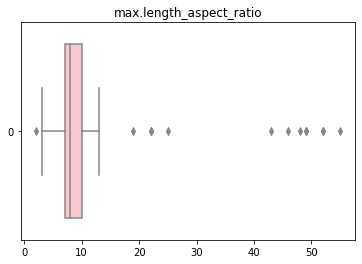

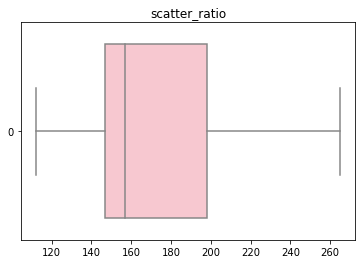

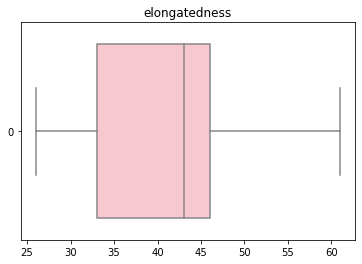

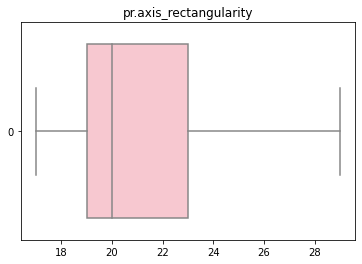

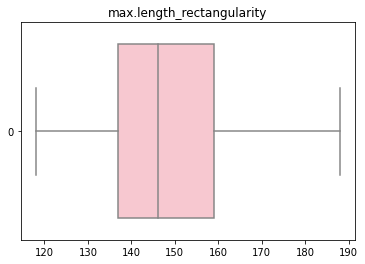

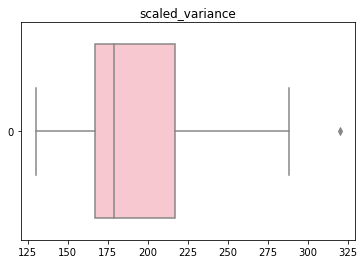

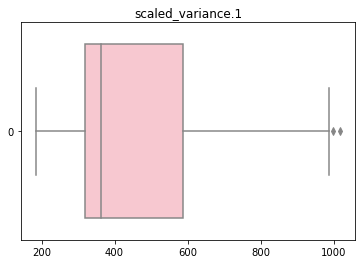

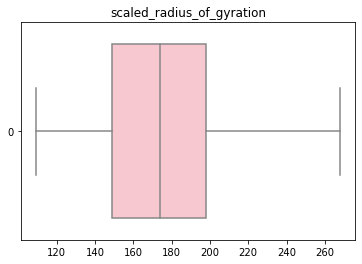

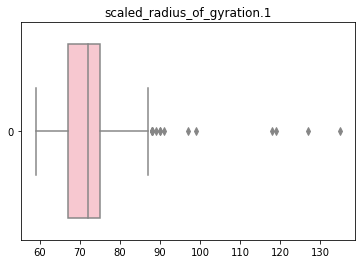

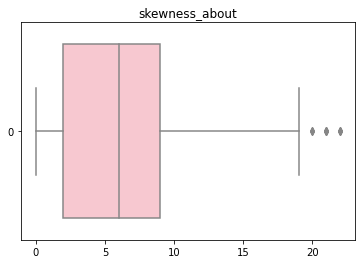

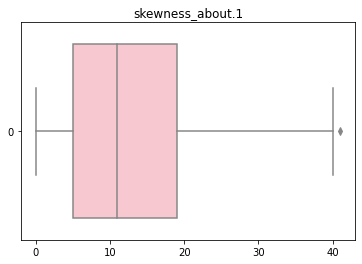

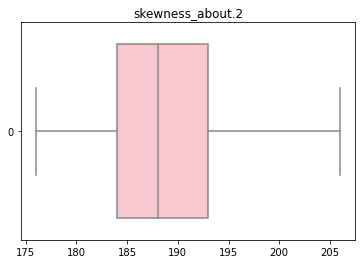

In [12]:
#Lets check for the outliers in teh dataset
for columns in cars.columns[:17]:
    plt.figure()
    plt.title(columns)
    sns.boxplot(data = cars[columns], orient="h" , color = 'pink')
    
# we can see that we have outliers in radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, 
# scaled_variance1, scaled_radius_of_gyration.1 , skweness_about

# Treating ouliers is really a big decision as it might caus information loss in case of data sets with large no of outliers

#SVM is not very robust to outliers and hence presence of a few outliers can lead to misclassification.
#Hence we choose to get rid of outliers

In [13]:
# For all the columns find the 1st and 3rd quartlie value
# Then calculate cutoff value for each column based on 1st and 3rd quartlie value
# Replace the outliers with median values

for columns in cars.columns[:17]:
    #find 1st and 3rd quartile
    q1 = cars[columns].quantile(0.25)
    q3 = cars[columns].quantile(0.75)
    iqr = q3 -q1
    
    #outlier cutoff
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    #replace oulier with median of each column
    cars.loc[(cars[columns] < low) | (cars[columns] > high), columns] = cars[columns].median()

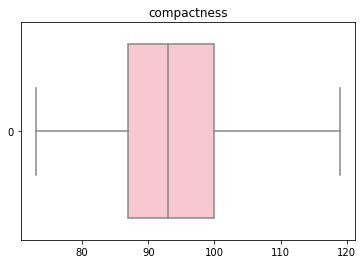

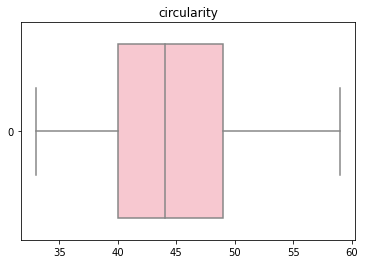

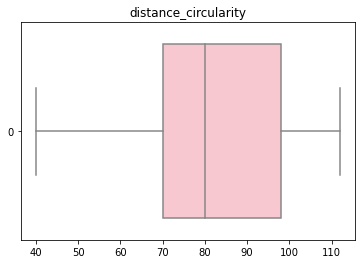

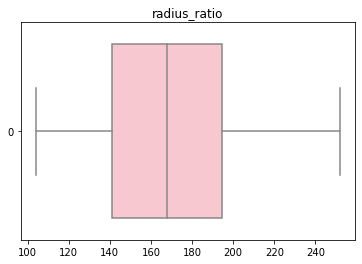

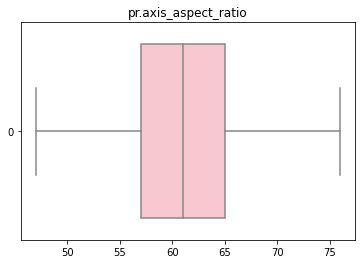

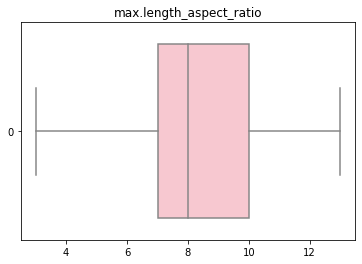

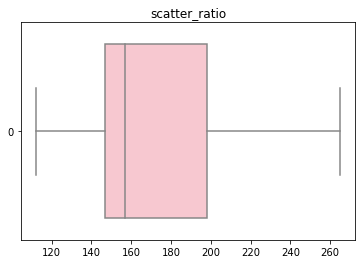

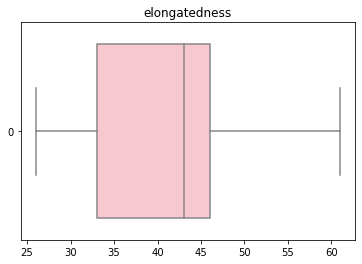

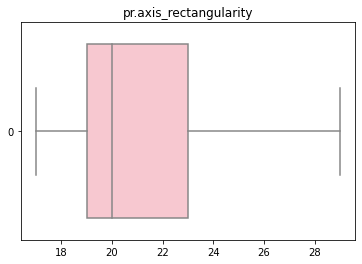

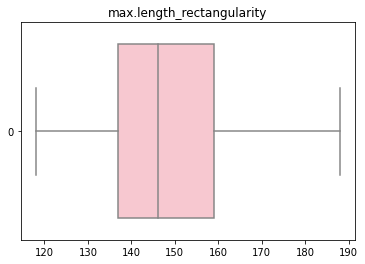

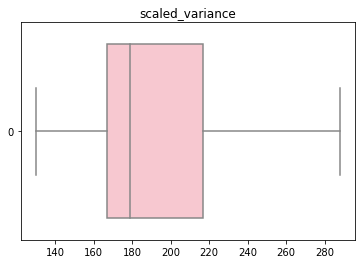

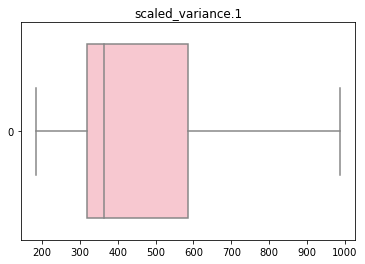

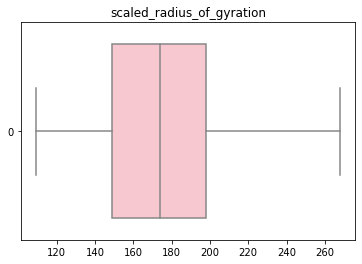

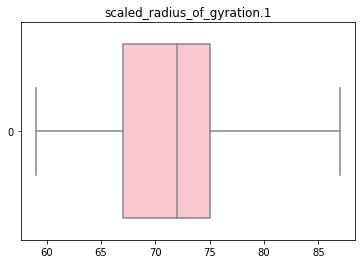

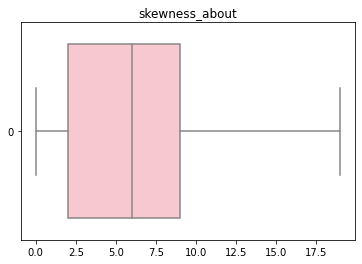

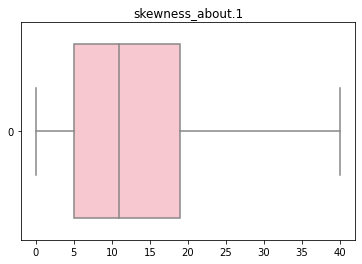

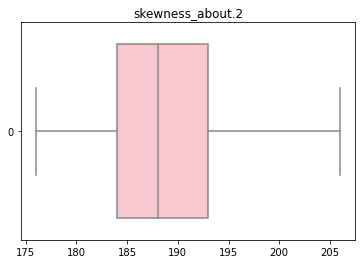

In [14]:
#Lets check for the outliers in the dataset again
for columns in cars.columns[:17]:
    plt.figure()
    plt.title(columns)
    sns.boxplot(data = cars[columns], orient="h" , color = 'pink')

# we can observe that we dont have nay outlier in the data set

<function matplotlib.pyplot.show(*args, **kw)>

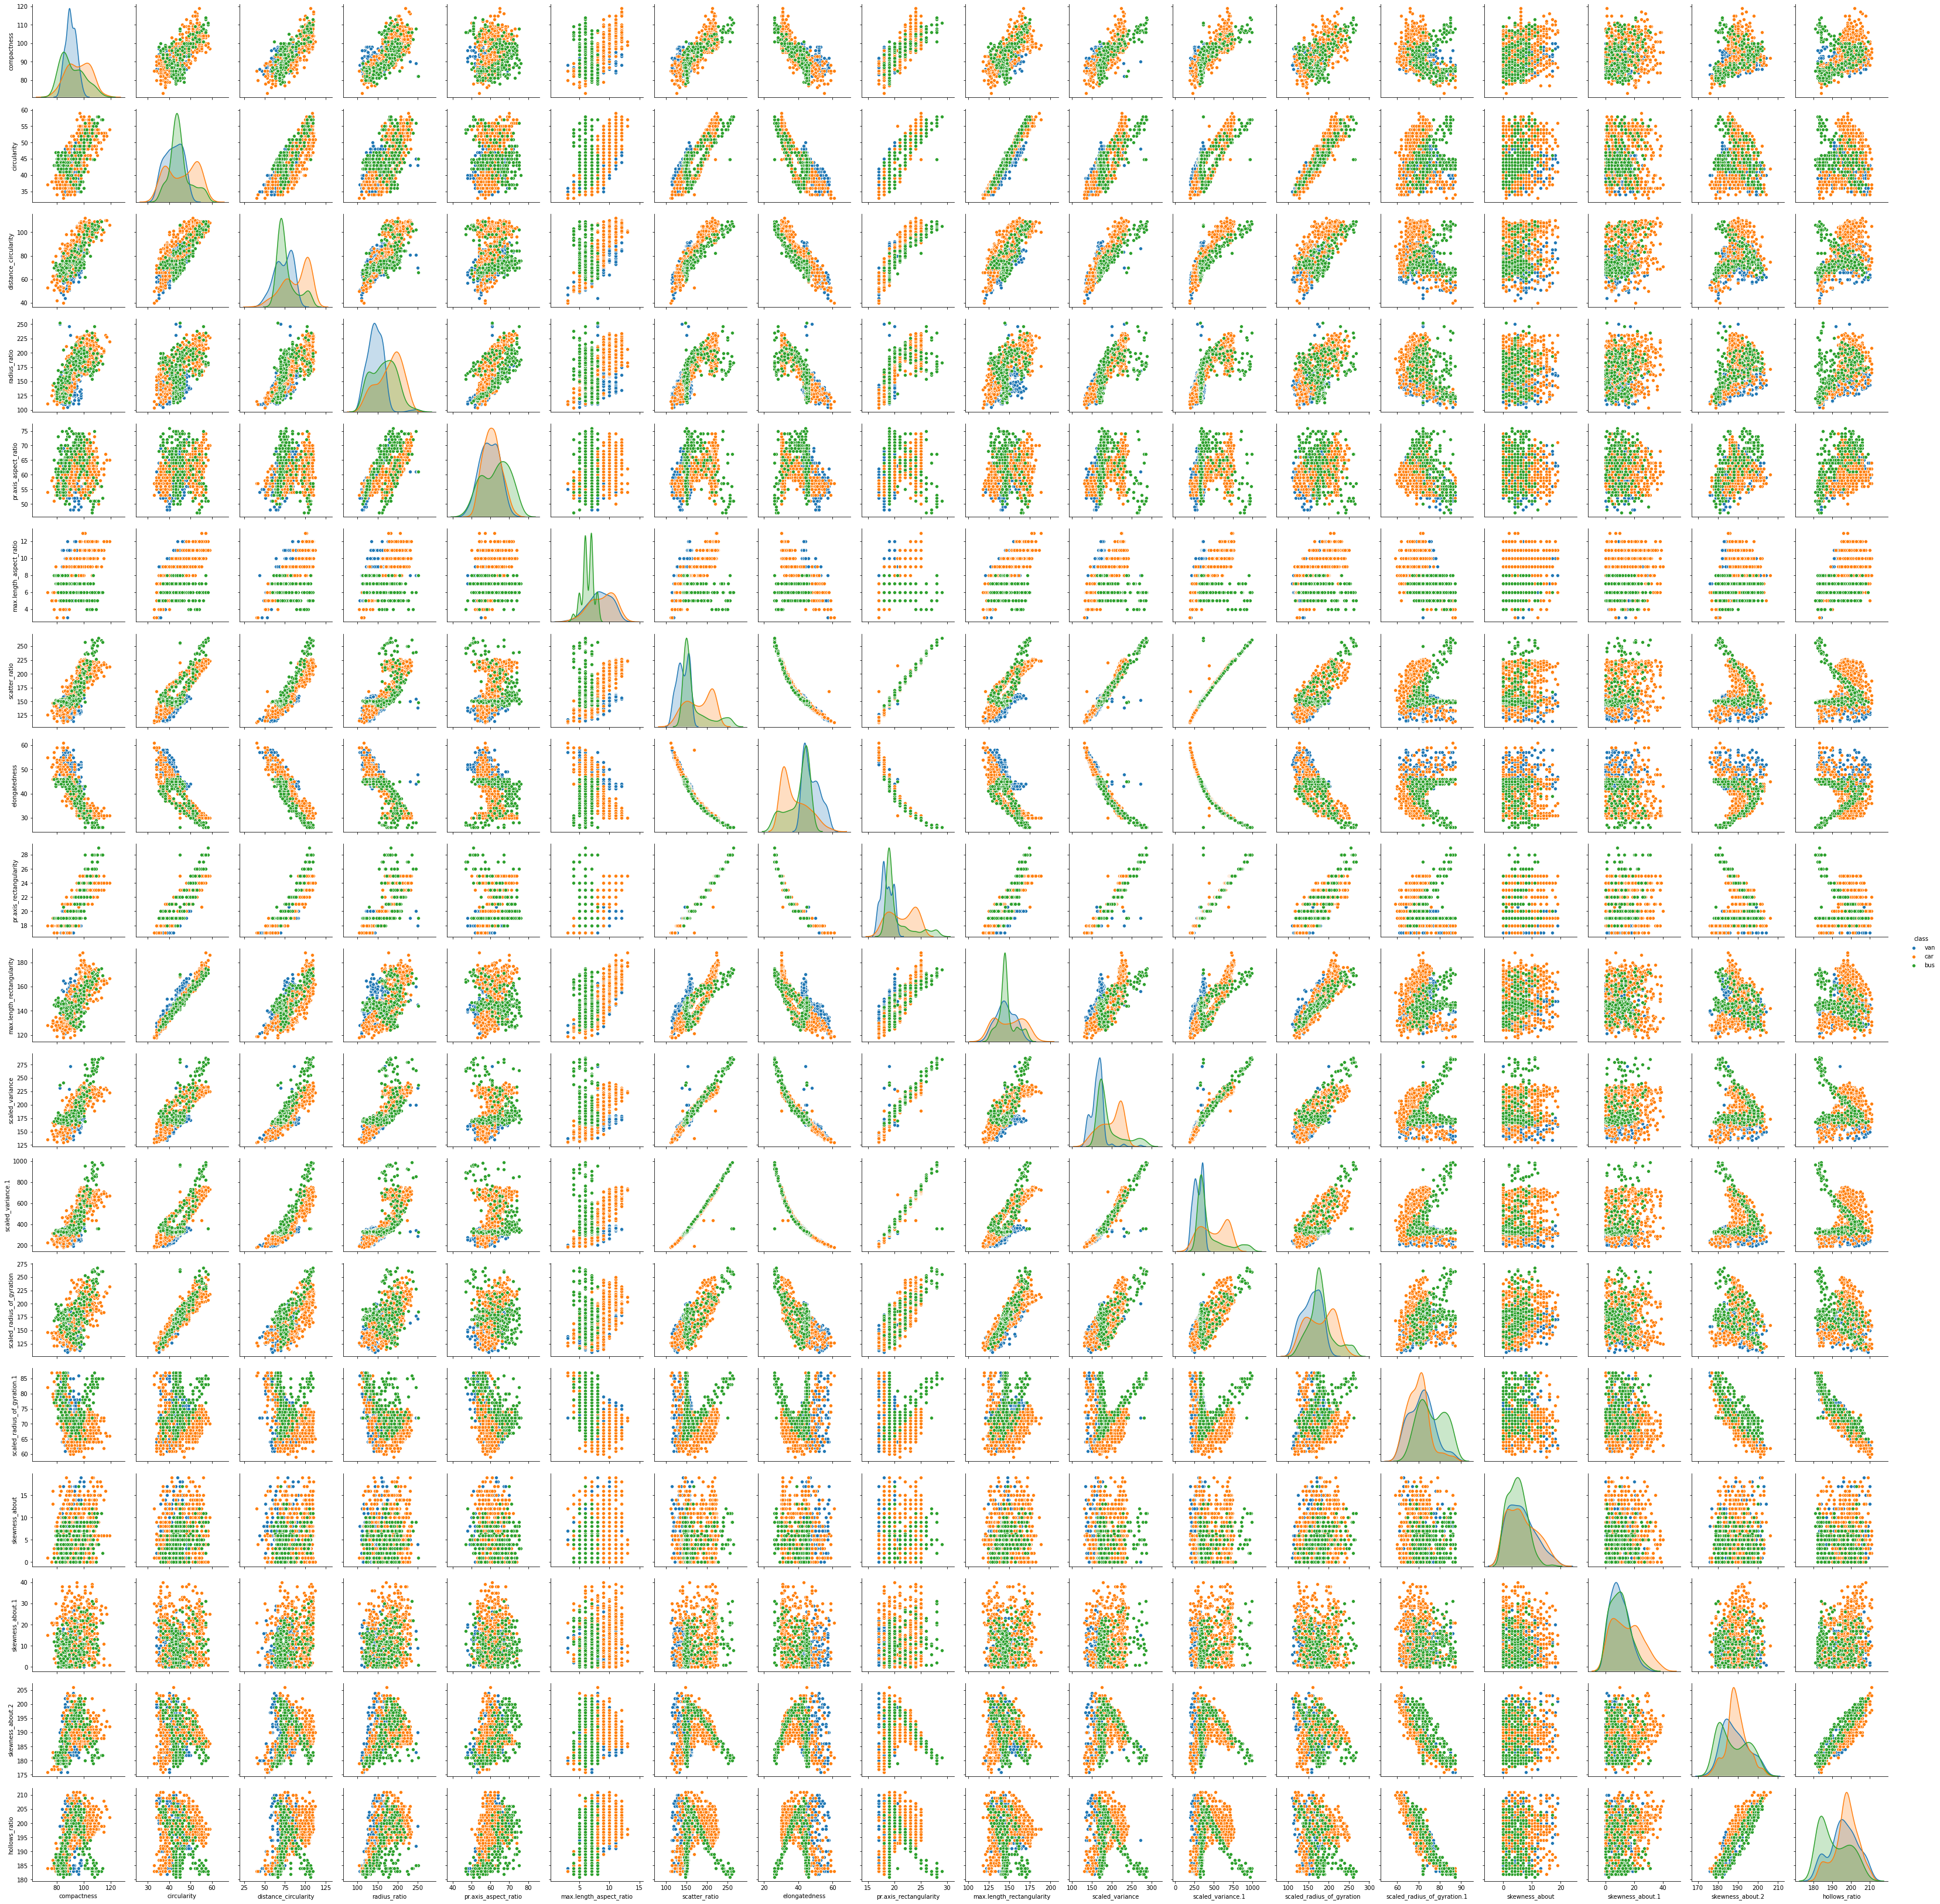

In [15]:
# Lets check the pairplot to see the individual distribution on diagonal plots 
# and correlation  of all columns among each other on either sides of diagonal plots

sns.pairplot(cars, hue = 'class')
plt.legend = True
plt.show
# Checking the correlation using pairplot, we can observe many positive slope and few negative slope
# that means many features are positively correlated with each other, meaning if one grows other gorws as well.
# We can also observe Distribution of each class on diagonol distribution under each feature
#(Blue - Van, Orange - car, green - bus)
#SInce the Class data is not linearly separable we can not have and Hard margin when we think of SVM

In [16]:
#for correlation, closer the value to 1, higher is the corelation betwen two features
cars.corr()
# we can observer clear correlation between each feature, lets visualize usign heatmap and then summarize our observation

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.721988     0.638393              0.794294   
pr.axis_aspect_ratio            0.193100     0.202738              0.244306   
max.length_aspect_ratio         0.499928     0.560067              0.666647   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr.axis_rectangularity          0.813636     0.844972              0.893128   
max.length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.770575     0.803291              0.870051   
scaled_variance.1               0.808092     0.830089              0.885282   
scaled_radius_of_gyration       0.585156     0.926888              0.705953   
scaled_radius_of_gyration.1    -0.248242     0.069350             -0.230187   
skewness_about                  0.196883     0.136594              0.099014   
skewness_about.1                0.156722    -0.010078              0.262354   
skewness_about.2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721988              0.193100   
circularity                      0.638393              0.202738   
distance_circularity             0.794294              0.244306   
radius_ratio                     1.000000              0.650738   
pr.axis_aspect_ratio             0.650738              1.000000   
max.length_aspect_ratio          0.463999              0.150277   
scatter_ratio                    0.769693              0.194212   
elongatedness                   -0.825686             -0.298492   
pr.axis_rectangularity           0.743994              0.162831   
max.length_rectangularity        0.579807              0.147896   
scaled_variance                  0.786985              0.207884   
scaled_variance.1                0.762029              0.197112   
scaled_radius_of_gyration        0.550987              0.148793   
scaled_radius_of_gyration.1     -0.390628             -0.321697   
skewness_about                   0.035738             -0.056127   
skewness_about.1                 0.179702             -0.021289   
skewness_about.2                 0.405705              0.400841   
hollows_ratio                    0.491694              0.415725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812235   
circularity                                 0.560067       0.848207   
distance_circularity                        0.666647       0.904400   
radius_ratio                                0.463999       0.769693   
pr.axis_aspect_ratio                        0.150277       0.194212   
max.length_aspect_ratio                     1.000000       0.490360   
scatter_ratio                               0.490360       1.000000   
elongatedness                              -0.504032      -0.970723   
pr.axis_rectangularity                      0.488316       0.989370   
max.length_rectangularity                   0.642713       0.808356   
scaled_variance                             0.401572       0.960513   
scaled_variance.1                           0.464533       0.981244   
scaled_radius_of_gyration                   0.397329       0.799266   
scaled_radius_of_gyration.1                -0.336639       0.010024   
skewness_about                              0.081637       0.064098   
skewness_about.1                            0.141861       0.212351   
skewness_about.2                            0.

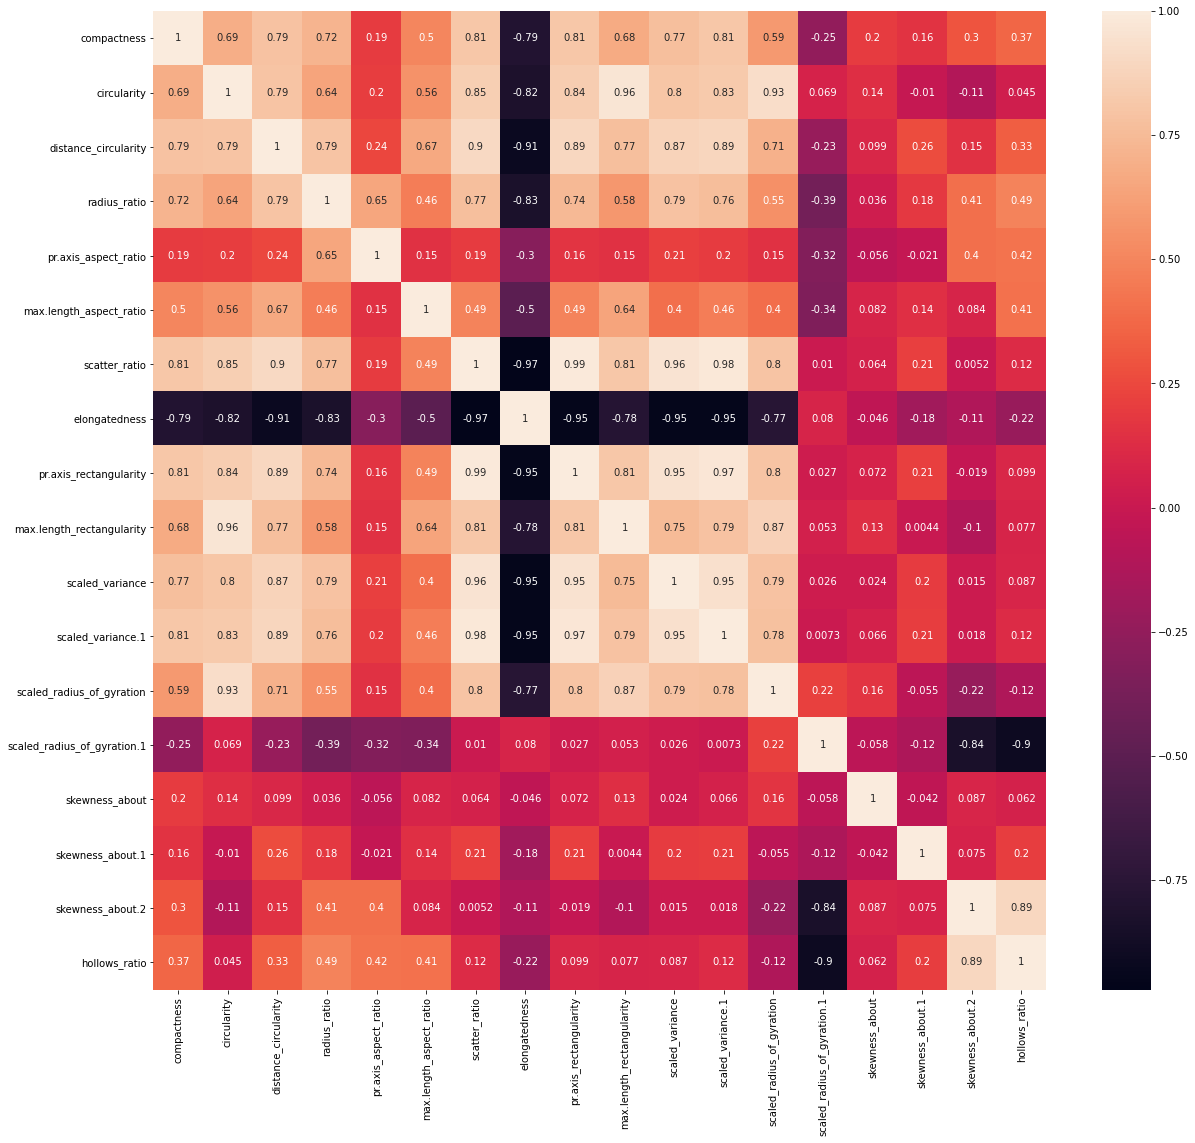

In [17]:
#Visualize the above correlation using heat map
plt.figure(figsize = (20,18))
sns.heatmap(cars.corr(), annot = True)

WE can see that there is heavy correlation between many features. like <br>
circularity is highly correlated with max.length_rectangularity, scaled_radius_of_gyration <br>
distance_circularity with scatter_ratio, axis_rectangularity,scaled_variance,scaled_variance1 <br>
Scatter_ratio with axis_rectangularity,scaled_variance, scaled_variance1 <br>
elongatedness is negatively correlated with most of the features <br>
pr.axis_rectangularity with scaled_variance, scaled_variance.1, <br>
scaled_variance with scaled_variance.1 and skewness_about.2 with hollows_ratio <br>

So for the classification models, more the linearly correlated features more difficult it becomes to make accurate predictions
hence if two features are highly correlated then there is no point using both features we can drop any one feature out of two.

Since we have many very highly colinear feature we might need to reduce the columns

# Split the data into training and testing data set 

In [33]:
x  = cars.drop(['class'] , axis = 1)
y = cars['class']

# Scaling the data set using standardScaler
from sklearn.preprocessing import StandardScaler

x_sc = StandardScaler().fit_transform(x)


In [101]:
x_train, x_test, y_train, y_test = train_test_split(x_sc,y,test_size=0.30, random_state=1)

# Lets create SVM model wthout reducing dimensions

In [102]:
# Import necessary libraries
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(x_train, y_train)

y_pred = svc_model.predict(x_test)
print ('Accuracy of SVC model without reducing any dimensions is:', accuracy_score(y_test, y_pred)*100 )
print ('classification report of this model is:' )
print(metrics.classification_report(y_test, y_pred))


Accuracy of SVC model without reducing any dimensions is: 90.94488188976378
classification report of this model is:
              precision    recall  f1-score   support

         bus       0.87      0.90      0.88        59
         car       0.92      0.92      0.92       133
         van       0.92      0.89      0.90        62

    accuracy                           0.91       254
   macro avg       0.90      0.90      0.90       254
weighted avg       0.91      0.91      0.91       254



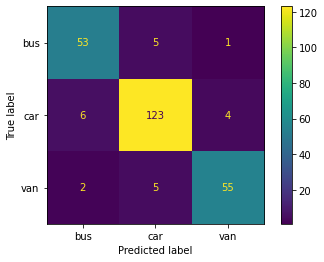

In [103]:
plot_confusion_matrix(svc_model,x_test,y_test)

In [21]:
# we can see that without reducing dimensions the model accuracy is 90.94% 
#under which it successfully predicted 88%, 92% and 90% correct bus,car and van silhouette respectively.
# For Bus: Model correctly predicted 53 observations as bus, and incorrectly predicted 5 cars and 1 van
# For Car: Model correctly predicted 123 observations as car, and incorrectly predicted 6 bus and 5 van
# For Van: Model correctly predicted 55 observations as van, and incorrectly predicted 2 bus and 5 car


# Lets reduce the dimensions using PCA

We can reduce dimensions using PCA by following below steps: <br>
1. Calculate the covariance matrix.<br>
2. Calculate the eigenvectors and their eigenvalues.<br>
3. Sort the eigenvectors according to their eigenvalues in descending order.<br>
4. Choose the first K eigenvectors (where k is the dimension we'd like to end up with).<br>
5. Build new dataset with reduced dimensionality.

In [36]:
# Calculate the covariance matrix
cov_matrix = np.cov(x_sc.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68623251  0.79084412  0.72284195  0.19332811  0.50051942
   0.81319623 -0.78957587  0.81459888  0.67694334  0.77148742  0.80904814
   0.58584865 -0.24853609  0.19711609  0.15690754  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.63914881  0.20297793  0.5607299
   0.84921058 -0.82287347  0.84597164  0.96308094  0.80424197  0.83107165
   0.92798524  0.06943233  0.13675532 -0.01009024 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.79523405  0.24459503  0.66743588
   0.90547061 -0.91251368  0.89418513  0.77558624  0.87108073  0.88632922
   0.70678835 -0.23045959  0.09913112  0.26266461  0.14573497  0.3324884 ]
 [ 0.72284195  0.63914881  0.79523405  1.00118343  0.65150778  0.46454839
   0.77060345 -0.8266636   0.74487406  0.58049352  0.78791632  0.76293107
   0.55163932 -0.39108991  0.03578066  0.17991457  0.40618509  0.49227551]
 [ 0.19332811  0.20297793  0.24459503  0.65150778  1.00118343  0

In [37]:
#Calculating Eigen Vectors & Eigen Values:

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.72480542e-01 -8.71212662e-02 -3.78964434e-02 -1.38548866e-01
   1.36797277e-01 -2.64261836e-01 -2.03865230e-01  7.61517056e-01
  -3.61009519e-01 -1.55568001e-01 -8.83359803e-02 -2.04647786e-02
  -1.65211759e-02  6.68534883e-02  3.45967273e-02 -9.24440830e-02
   8.93635473e-02 -4.78840947e-02]
 [-2.87356007e-01  1.32310949e-01 -2.01243444e-01  3.74762788e-02
  -1.37973644e-01  7.00378119e-02  3.90705579e-01  6.78349827e-02
  -5.20951662e-02  1.82388332e-01  3.19036821e-02 -1.40235218e-01
  -5.15200341e-02  5.70611288e-02 -6.91843606e-01 -1.06380826e-01
   2.82335282e-01  2.11119309e-01]
 [-3.02364527e-01 -4.58975423e-02  6.32692058e-02 -1.08738857e-01
  -7.98038002e-02  1.73699112e-02 -1.63453860e-01 -2.79698372e-01
  -8.68769674e-02 -2.54218483e-01 -4.87416369e-01 -6.44944661e-01
   8.88959542e-03 -1.58478895e-01  5.39689053e-03  5.67471350e-02
  -1.09970100e-01  1.13061599e-01]
 [-2.69713182e-01 -1.97593670e-01  5.55267284e-02  2.54696204e-01
   1.34068249e-01  

In [38]:
#Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs:
eig_pairs = [(eigenvalues[i], eigenvectors[:,i]) for i in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.753412591212186, array([-0.27248054, -0.28735601, -0.30236453, -0.26971318, -0.09788952,
       -0.19514964, -0.31029716,  0.30891303, -0.30727454, -0.27810531,
       -0.29979947, -0.30590519, -0.26317669,  0.04225767, -0.03596387,
       -0.05883164, -0.03792511, -0.08470876])), (3.3535881499853644, array([-0.08712127,  0.13231095, -0.04589754, -0.19759367, -0.25754969,
       -0.1080129 ,  0.07518675, -0.01316377,  0.08762497,  0.12211054,
        0.07694534,  0.0710155 ,  0.21065614,  0.50390812, -0.01569074,
       -0.0927881 , -0.50164563, -0.50751593])), (1.1926947965120702, array([-0.03789644, -0.20124344,  0.06326921,  0.05552673, -0.063336  ,
       -0.14828409,  0.10927048, -0.09115793,  0.10583815, -0.2135114 ,
        0.14505148,  0.10963794, -0.20298674,  0.07360817, -0.5588378 ,
        0.67106115, -0.06243795, -0.04167763])), (1.1341464565152917, array([-0.13854887,  0.03747628, -0.10873886,  0.2546962 ,  0.61298235,
       -0.27910138, -0.00550929, -0.06556392, -0.

In [108]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in eigvalues_sorted]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%


print('Cumulative Variance explained:\n' , cum_var_exp)


Cumulative Variance explained:
 [0.54121576 0.72730599 0.79348849 0.85642215 0.90545694 0.94240878
 0.9600353  0.97265148 0.97979513 0.98420677 0.98826512 0.99184435
 0.99404245 0.9957818  0.99739623 0.99861947 0.99966914 1.        ]


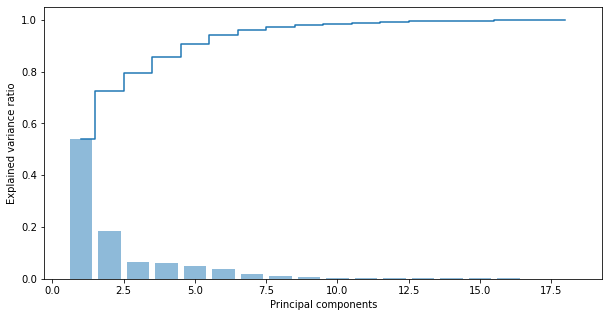

In [115]:
# Plotting the Explained variance and principal components
plt.figure(figsize=(10,5))
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

# From below we plot we can clealry observe that 10 dimension() are able to explain 98 %variance of data. 
# so we will use first 10 principal components going forward and calulate the reduced dimensions.

In [93]:
# P_reduce represents reduced mathematical space....

x_reduce = np.array(eigvectors_sorted[0:10])   # Reducing from 18 to 10 dimension space

x_pca_10D = np.dot(x_sc,x_reduce.T)   # projecting original data into principal component dimensions

x_reduced_pca = pd.DataFrame(x_pca_10D)  # converting array to dataframe for pairplot

x_reduced_pca

0         1         2         3         4         5         6  \
0   -0.582592 -0.675578 -0.455460  0.749984 -0.775955  1.848623  0.183261   
1    1.514172 -0.350376 -0.331585 -1.269450 -0.325628  0.119446 -0.202006   
2   -3.911615  0.234211 -1.266354 -0.138470  0.915057  0.684241 -0.811789   
3    1.536810 -3.045725 -0.469895 -0.324979 -0.614045 -0.366162 -0.116718   
4    0.647023  1.528621 -0.240215  0.560100  0.484285  1.023379 -0.478345   
..        ...       ...       ...       ...       ...       ...       ...   
841  0.388538 -0.638758  1.463537 -0.285376  0.812558  0.910231 -0.869405   
842  0.040005 -0.194370  0.567197  0.246158 -1.921314  1.451552  0.300678   
843 -5.118793 -0.182603 -0.510318  0.991192 -1.323327 -0.170833 -0.882832   
844  3.298383 -1.104088  1.934292 -0.438700 -0.501694 -0.018225  0.261371   
845  4.969238  0.420677  1.309316 -0.290674 -0.175180 -0.385151  0.393957   

            7         8         9  
0    0.687267 -0.306152  0.154516  
1   -0.109411  0.285522 -0.387734  
2   -0.172951 -0.202771 -0.521269  
3    0.191698  0.391095  0.252646  
4   -1.225594 -1.434776 -0.072792  
..        ...       ...       ...  
841 -0.222378 -0.150848 -0.251405  
842  0.319749  0.157604  0.012214  
843  0.389255  0.089245  0.547767  
844 -0.452803 -0.838817 -0.312177  
845  0.218393 -0.602388  0.129553  

[846 rows x 10 columns]

In [97]:
# Now that we have our PCA reduced data , we can now train the SVM model and find out how well does it perform

In [94]:
# Split the data based on reduced data set
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced_pca,y,test_size=0.30, random_state=1)

In [95]:
# Lets create SVM model with reduced dimensions

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(x_train_pca, y_train_pca)

y_pred = svc_model.predict(x_test_pca)
print ('Accuracy of SVC model with reduced dimensions is:', accuracy_score(y_test_pca, y_pred)*100 )
print ('classification report of this model is:' )
print(metrics.classification_report(y_test_pca, y_pred))


Accuracy of SVC model with reduced dimensions is: 88.9763779527559
classification report of this model is:
              precision    recall  f1-score   support

         bus       0.85      0.90      0.88        59
         car       0.90      0.91      0.90       133
         van       0.91      0.84      0.87        62

    accuracy                           0.89       254
   macro avg       0.89      0.88      0.88       254
weighted avg       0.89      0.89      0.89       254



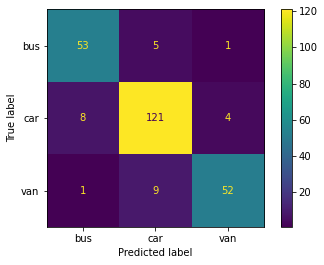

In [96]:
#Plotting the confusion Matrix
plot_confusion_matrix(svc_model,x_test_pca,y_test_pca)

In [116]:
# we can see that after reducing dimensions the model accuracy is 88.97% 
#under which it successfully predicted 90%, 91% and 84% correct bus,car and van silhouette respectively.
# For Bus: Model correctly predicted 53 observations as bus, and incorrectly predicted 5 cars and 1 van
# For Car: Model correctly predicted 121 observations as car, and incorrectly predicted 8 bus and 4 van
# For Van: Model correctly predicted 52 observations as van, and incorrectly predicted 1 bus and 9 car

From above we can see that with reduced number of dimensions the model's performance is close to 89% and without reducing the dimensions models accuracy is 90%, Based on the project context, we can easily compromise on 1% of the model's performance as against the time and resources being used by the model while accurating.

We can observe that from 18 dimensions using PCA we were able to reduce dimensions and come down to 10 dimensions.
Based on the business decisions we can further reduce the dimensions or increase the dimensions considering any one of the two factors.

